In [2]:
# 非線形次元削減アルゴリズム
# 射影に依存しない多様体学習
# 個々の訓練インスタンスを最近傍のK個のインスタンスを見つけそれを線形関数として再構築する
# 上記の関係を最大限維持した低次元空間を探す

# 大規模なデータセットに対してのスケーラビリティは低いことに注意

# 以下お決まり設定
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [5]:
# スイスロールデータを使う
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [6]:
from sklearn.manifold import LocallyLinearEmbedding # swiss rollを展開する　LocallyLinearEmbedding　クラス(LLEのこと)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

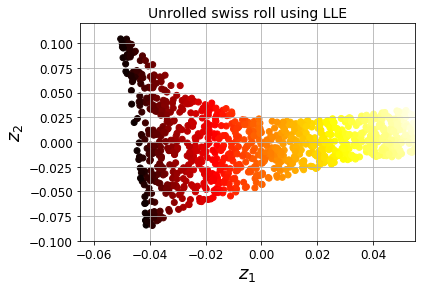

In [7]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.savefig("lle_unrolling_plot")
plt.show()

# 局所的なインスタンス間の距離は維持されている


In [ ]:
# その他の次元削減方法　MDS, Isomap and t-SNE

# MDS：インスタンス間の距離を維持しながら次元削減を行う
# Isomap：個々のインスタンスと複数の最近傍インスタンスを結んでグラフを作ってからインスタンス間の測地距離を維持する次元削減を行う
# t-SNE：類似するインスタンスを近くに保ち、似ていないインスタンスを遠くに遠ざけながら次元削減を行う。高次元データの視覚化に使われる
# LDA：SVMと相性がいい次元削減。訓練中にクラスを最も特徴的に分ける軸を学習し、その軸を使って射影を行う。

In [8]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [9]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [12]:
# LDAは実際には分類アルゴリズムであるため、MNIST分類を例に実装を記載する
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from six.moves import urllib
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

C:\Anaconda3\envs\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


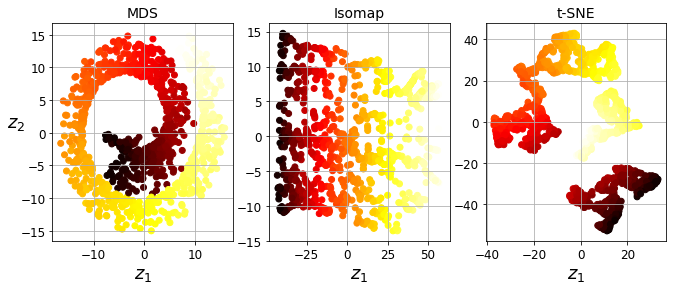

In [13]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.savefig("other_dim_reduction_plot")
plt.show()